# First approach to Cancer and Daily Caloric Supply

In [213]:
import pandas as pd
# import numpy as np

In [214]:
# Load datasets
# country = 'GBR'

url1 = 'https://raw.githubusercontent.com/miguel-mx/datasets/master/share-population-with-cancer.csv'
url2 = 'https://raw.githubusercontent.com/miguel-mx/datasets/master/daily-caloric-supply.csv'

# Share population with cancer SPWC
spwc = pd.read_csv(url1, error_bad_lines=False)

# Daily Caloric Supply DCS 
# kilocalories per person per day
dcs = pd.read_csv(url2, error_bad_lines=False)


In [215]:
# Extract only GBR country
gbr = dcs.loc[dcs['Code'] == 'GBR']

In [216]:
# Remove Entity and Code columns (is the same for all rows)
# Set year as the index (maybe treat as time series)

gbr = gbr.drop(['Entity','Code'], axis = 1)
gbr.set_index(['Year'])
gbr.head(5)

,Year,Animal-protein,Plant-protein,Fat,Carbohydrates
477,1961,214.88,150.00,1223.82,1642.30
478,1962,219.48,151.92,1238.22,1586.38
479,1963,217.88,152.68,1211.94,1642.50
480,1964,222.80,149.80,1215.45,1619.95
481,1965,219.76,149.00,1227.33,1643.91


In [217]:
# Get Cancer prevalence for GBR
prevalence = spwc.loc[spwc['Code'] == 'GBR']
prevalence = prevalence.drop(['Entity','Code'], axis = 1)
prevalence.set_index(['Year'])  # Don't work?
prevalence.head(5)

,Year,Prevalence
252,1990,1.970745
253,1991,2.012251
254,1992,2.052186
255,1993,2.101779
256,1994,2.125211


In [218]:
# New column total of calories 
gbr['Calories'] = gbr[['Animal-protein', 'Plant-protein', 'Fat', 'Carbohydrates']].sum(axis=1)
gbr.head(5)

,Year,Animal-protein,Plant-protein,Fat,Carbohydrates,Calories
477,1961,214.88,150.00,1223.82,1642.30,3231.0
478,1962,219.48,151.92,1238.22,1586.38,3196.0
479,1963,217.88,152.68,1211.94,1642.50,3225.0
480,1964,222.80,149.80,1215.45,1619.95,3208.0
481,1965,219.76,149.00,1227.33,1643.91,3240.0


## > 3000 Calories by day is not a low calorie intake

## Cancer Data vs Protein intake

*** Cancer ***
From 1990 to 2017

*** Protein ***
From 1961 to 2013


In [219]:
#Remove years befor 1990
gbr = gbr[(gbr.Year >= 1990)]

#Remove years after 2013
prevalence = prevalence[(prevalence.Year <= 2013)]

In [220]:
gbr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 506 to 529
Data columns (total 6 columns):
Year              24 non-null int64
Animal-protein    24 non-null float64
Plant-protein     24 non-null float64
Fat               24 non-null float64
Carbohydrates     24 non-null float64
Calories          24 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.3 KB


In [221]:
prevalence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 252 to 275
Data columns (total 2 columns):
Year          24 non-null int64
Prevalence    24 non-null float64
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


In [227]:
# Copy the Cancer prevalence column to Caloric DataFrame
gbr['Prevalence'] = prevalence['Prevalence'].values
gbr.head(5)

,Year,Animal-protein,Plant-protein,Fat,Carbohydrates,Calories,Prevalence
506,1990,214.36,161.08,1230.93,1634.63,3241.0,1.970745
507,1991,212.32,158.16,1227.60,1609.92,3208.0,2.012251
508,1992,216.88,156.60,1304.82,1592.70,3271.0,2.052186
509,1993,210.76,162.24,1272.51,1572.49,3218.0,2.101779
510,1994,213.32,162.24,1248.30,1611.14,3235.0,2.125211


In [223]:
# Correlation between Total Calories and Cancer Prevalence 

gbr[['Calories', 'Prevalence']].corr()

,Calories,Prevalence
Calories,1.000000,0.831086
Prevalence,0.831086,1.000000


## Total daily calories intake vs Cancer prevalence correlation is High

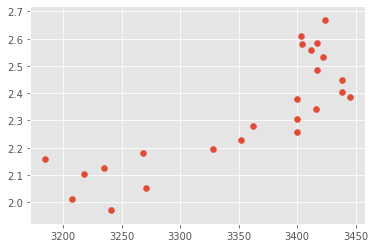

In [224]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')


plt.figure(figsize=(6,4))
plt.scatter(gbr.Calories, gbr.Prevalence)
plt.show()


# Notes

* I will test this code with the rest of the countries.


* If we talk more in general about Hunger and Undernourishment. This problem affects more the developing countries and children in specific. Most of this children never grow up to be affected by cancer.
https://ourworldindata.org/hunger-and-undernourishment#depth-of-the-food-deficit


* Most developed countries have more cancer prevalence. ¿Life expentancy is higher? This countries don't have Hunger and Undernourishment problems.
https://ourworldindata.org/cancer#cancer-prevalence


* Because of the points 2 and 3, I'm not sure about the direct correlation between the Calories intake and the Cancer prevalence. The correlation could be just coincidence? 


* The set of observations is small: from 1990 to 2013


* Looking for information about this issue I found that there are a problem with cancer patients and malnutrition. But this is a different problem.


* If we convert the year index to datetime could we treat the dataset as a timeseries?